# Conformity evaluation of compressive strength of hardened concrete.
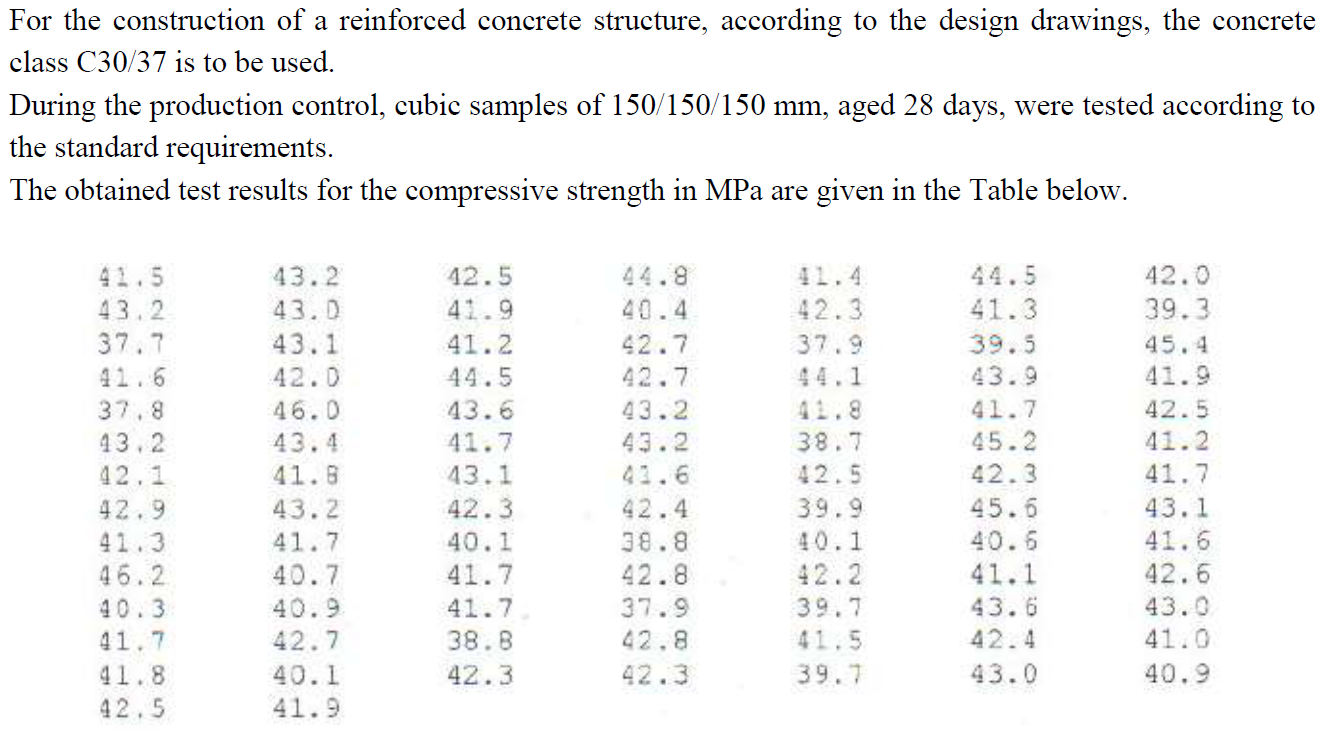

---

In [1]:
#Importing libraries to help with calculations and further work

import pandas as pd
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy.interpolate import make_interp_spline, BSpline
import scipy as sp

# <p style="color:red">At first I want to calculate all the data desribing features (like variance, standart deviation etc) without grouping into intervals but by using the power of computer: Let's calculate in both ways and see, if there is a difference.

## Step1. First look and examination
##### Originally steps 1+2. Grouping into intervals and calculations of fcm and s

__To begin with, let's create a dataframe and fill it with data given above:__

In [2]:
data = [41.5,43.2,37.7,41.6,37.8, 43.2, 42.1, 42.9, 41.3, 46.2, 40.3, 41.7, 41.8, 42.5, 43.2, 43.0, 43.1, 42.0, 46.0, 43.4, 41.8, 43.2, 41.7, 40.7, 40.9, 42.7, 40.1, 41.9, 42.5, 41.9, 41.2, 44.5, 43.6, 41.7, 43.1, 42.3, 40.1, 41.7, 38.8, 42.3, 44.8, 40.4, 42.7, 42.7, 43.2, 43.2, 41.6, 42.4, 38.8, 42.8, 37.9, 42.8, 42.3, 41.4, 42.3, 37.9, 44.1, 41.8, 38.7, 42.5, 39.9, 40.1, 42.2, 39.7, 41.5, 39.7, 44.5, 41.3, 39.5, 43.9, 41.7, 45.2, 42.3, 45.6, 40.6, 41.1, 43.6, 42.4, 43.0, 42.0, 39.3, 45.4, 41.9, 42.5, 41.2, 41.7, 43.1, 41.6, 42.6, 43.0, 41.0, 40.9]

In [3]:
concrete = pd.DataFrame(data = data) #creating a dataframe, using pandas library

In [4]:
concrete.columns = ['strength']

Quick look at 5 samples:

In [5]:
concrete.head(5)

,strength
0,41.5
1,43.2
2,37.7
3,41.6
4,37.8


__Let's also see an average compressive strength amount and standart deviation for our samples:__

In [6]:
print('Average is {:.2f} MPa'.format(concrete.mean()[0]))

Average is 41.95 MPa


In [7]:
print('Standart deviation is {:.2f} MPa'.format(concrete.std()[0]))

Standart deviation is 1.76 MPa


__The distribution of compressive strength results is close to normal__

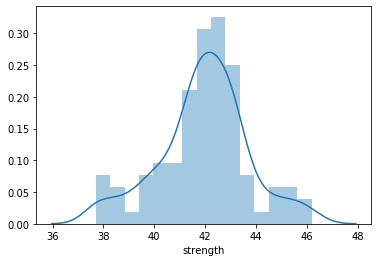

In [8]:
sns.distplot(concrete['strength'], bins = 15)

## Conclusion

- I created a dataframe with all 92 results of the compressive strenth tests
- We can say that the distribution of the results is close to the normal distribution, so the given data is trustworthy
- Average compressive strength of the samples is 41.95 MPa
- Standart deviation of the dataset is 1.76 MPa

---

## Step 2. Pretreatment of data 

__Confidence interval__

Let's drop all results that disobey "the rule of 3 sigmas"

_Dropping all the results before __fcm - 3std__ _and after_ __fcm + 3std__

In [9]:
concrete_confident = concrete.loc[(concrete['strength'] <= concrete.mean()['strength'] + 3 * concrete.std()['strength'])]

In [10]:
concrete_confident = concrete_confident.loc[(concrete['strength'] >= concrete.mean()['strength'] - 3 * concrete.std()['strength'])]

In [11]:
concrete_confident

,strength
0,41.5
1,43.2
2,37.7
3,41.6
4,37.8
...,...
87,41.6
88,42.6
89,43.0
90,41.0


As we can see above, the amount of reliable samples is the same as the original amount. 

In other words, __we can trust all the results of the tests, there is no need to drop anything from our dataset__

## Conclusion

All of the test results are checked to belong to the reliable limits of the data (__Confidence interval__). We don't have to drop any test results to continue the evaluation

Results stay the same:

s = 1.76 MPa

Fcm = 41.95 MPa

---

# <p style="color:red"> From this moment I perform all the calculations as it's stated in methodic materials.

## Step 1. Grouping into intervals

Let's group all the samples into intervals in step of 1 MPa:

In [12]:
concrete_intervals = concrete
concrete_intervals['group'] = concrete['strength'].astype('int')
concrete_intervals

,strength,group
0,41.5,41
1,43.2,43
2,37.7,37
3,41.6,41
4,37.8,37
...,...,...
87,41.6,41
88,42.6,42
89,43.0,43
90,41.0,41


## Conclusion:

We have 92 samples, I groupped them into 10 intervals, interval value is 1 MPa.

---

## Step 2. Calculating fcm and s

In [13]:
# Creating a pivot table, where all samples are distributed between groups,
# adding two more columns: amount of samples in each interval and average strength in the group.
concrete_groupped = concrete_intervals.pivot_table(index = 'group', values = 'strength', aggfunc = ('count', 'mean')).reset_index()

# Adding a column with an average multiplied by the amount of the group samples (n)
concrete_groupped['mean*count'] = concrete_groupped['mean'] * concrete_groupped['count']

# Adding a column with the difference of the group_mean and total mean(41.95 MPa in our case), squared and
# multiplied by the amount of samples in each group
concrete_groupped['for_stand'] = ((
                              (concrete_groupped['mean*count'].sum() / concrete_groupped['count'].sum()
                              - concrete_groupped['mean'])**2
                              )* concrete_groupped['count'])

#Showing the final table
display(concrete_groupped)

#Showing the average amount
print('Average is {:.2f} MPa'.format(concrete_groupped['mean*count'].sum() / concrete_groupped['count'].sum()))

#Showing the Standart deviation
number = concrete_groupped['count'].sum() - 1
(concrete_groupped['for_stand'].sum() / number)**0.5
print('Standart deviation is {:.2f} MPa'.format((concrete_groupped['for_stand'].sum() / number)**0.5))

avera = concrete_groupped['mean*count'].sum() / concrete_groupped['count'].sum() #average, saved to a variable
stand = (concrete_groupped['for_stand'].sum() / number)**0.5  #Standart deviation, saved to a variable

,group,count,mean,mean*count,for_stand
0,37,4,37.825000,151.3,68.098374
1,38,3,38.766667,116.3,30.421598
2,39,5,39.620000,198.1,27.169832
3,40,9,40.455556,364.1,20.129528
4,41,24,41.566667,997.6,3.546695
5,42,22,42.445455,933.8,5.376785
6,43,16,43.250000,692.0,26.994802
7,44,4,44.475000,177.9,25.480548
8,45,3,45.400000,136.2,35.685004
9,46,2,46.100000,92.2,34.426959


Average is 41.95 MPa
Standart deviation is 1.75 MPa


## Conclusion
Average is 41.95 MPa.

Standart deviation in this way of calculating has changed, but not significantly: from 1.76 MPa to 1.75 MPa, 

_which also means that all of our data is still in the confidence interval._


---

## Step 3. Confidence interval. 

As said above, all of data stays inside the confidence interval (+/- 3 * std)

## Conclusion

There is no need in dropping any data out of our set. We can continue

---

## Step 4. Calculation of empirical and theoretical (Gauss) curves

Let's continue adding new columns to our table:

In [14]:
# Calculating "abscissa" column
concrete_groupped['abscissa'] = (concrete_groupped['mean*count'].sum() 
                                 / concrete_groupped['count'].sum() - concrete_groupped['mean'])

# Calculating Empirical values
concrete_groupped['empirical'] = concrete_groupped['count'] / concrete_groupped['count'].sum()
np.exp(- ((avera - concrete_groupped['mean'])**2 ) / (2 * stand**2))

# Calculating theoretical values
concrete_groupped['theoretical'] =(
    (1 / (stand * (2*3.14)**0.5)) * np.exp(- ((avera - concrete_groupped['mean'])**2 ) / (2 * stand**2))
)

In [15]:
concrete_groupped

,group,count,mean,mean*count,for_stand,abscissa,empirical,theoretical
0,37,4,37.825000,151.3,68.098374,4.126087,0.043478,0.013996
1,38,3,38.766667,116.3,30.421598,3.184420,0.032609,0.043302
2,39,5,39.620000,198.1,27.169832,2.331087,0.054348,0.093726
3,40,9,40.455556,364.1,20.129528,1.495531,0.097826,0.158372
4,41,24,41.566667,997.6,3.546695,0.384420,0.260870,0.223107
5,42,22,42.445455,933.8,5.376785,-0.494368,0.239130,0.219598
6,43,16,43.250000,692.0,26.994802,-1.298913,0.173913,0.173311
7,44,4,44.475000,177.9,25.480548,-2.523913,0.043478,0.080381
8,45,3,45.400000,136.2,35.685004,-3.448913,0.032609,0.032471
9,46,2,46.100000,92.2,34.426959,-4.148913,0.021739,0.013569


## Conclusion

I have performed all the needed calculation, added three more columns to the table.

We are ready to plot the curves

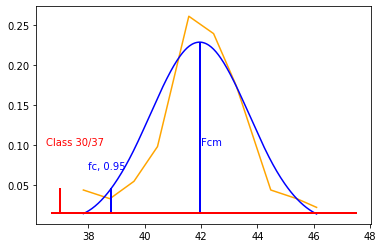

In [16]:
# Transcending the arrays of numbers to axises
x = np.array(concrete_groupped['mean'])
y1 = np.array(concrete_groupped['empirical'])
y2 = np.array(concrete_groupped['theoretical'])

#Spline-ing the curves
new_length = 300
new_x = np.linspace(x.min(), x.max(), new_length)
new_y1 = sp.interpolate.interp1d(x, y1, kind='cubic')(new_x)
new_y2 = sp.interpolate.interp1d(x, y2, kind='cubic')(new_x)

#Plotting. Theoretical curve is blue, empirical is yellow.
#plt.plot(x, y1, color = 'orange') - spline-d version of an empirical curve, uncomment if you want to see it.
plt.plot(x, y1, color = 'orange')
plt.plot(new_x, new_y2, color = 'blue')

#Some indicators and numbers, required to be shown on the plot

#F 0.95
plt.plot([38.8, 38.8], [0.045, 0.015], 'k-', lw=2, color = 'blue', label = 'f 0.95')
plt.text(38, 0.07, 'fc, 0.95', fontdict=None, color = 'blue')


#F cm
plt.plot([avera, avera], [0.227, 0.015], 'k-', lw=2, color = 'blue')
plt.text(avera + 0.05, 0.1, 'Fcm', fontdict=None, color = 'blue')

#Class of concrete
plt.plot([37, 37], [0.045, 0.015], 'k-', lw=2, color = 'red')
plt.text(36.5, 0.1, 'Class 30/37', fontdict=None, color = 'red')

plt.plot([36.7, 47.5], [0.015, 0.015], 'k-', lw=2, color = 'red')

plt.show()

## Conclusion

On the plot above we can see, that samples' strength values are distributed normally.

Blue curve stays for theoretical data, orange - for empirical. As seen above, there is a difference between two of them: data is never ideal.

I am still a little bit bad at plots.



---

## Step 6. Conformity Assesment

fc 0.95 = 38.8 MPa

In [17]:
print('fcm - 1.64S = {:.2f}'.format(avera - 1.64*stand))

fcm - 1.64S = 39.09


## Conclusion

fc 0.95 < F cm - 1.64S, so our concrete is conform to the given class. (C30/37)

---

# General Conclusion

__Firstly, I wanted to calculate some of dataset info (such as standart deviation) using the power of a computer__

- I created a dataframe with all 92 results of the compressive strenth tests.

- We can say that the distribution of the results is close to the normal distribution, so the given data is trustworthy

- Average compressive strength of the samples is 41.95 MPa

- Standart deviation of the dataset is 1.76 MPa

- All of the test results are checked to belong to the reliable limits of the data (Confidence interval). We don't have to drop any test results to continue the evaluation

__Following the task:__

- We have 92 samples, I groupped them into 10 intervals (from 37 to 46 MPa), interval value is 1 MPa.

- Average is 41.95 MPa. Standart deviation in this way of calculating has changed, but not significantly: from 1.76 MPa to 1.75 MPa, _which also means that all of our data is still in the confidence interval._

- There is no need in dropping any data out of our set. We can continue, all data is in confidence interval.

- I have performed all the needed calculation, added following columns to the table: abscissa, theoretical and empirical ordinates. We are ready to plot the curves.

- On the plot above we can see, that samples' strength values are distributed normally. Blue curve stays for theoretical data, orange - for empirical. As seen above, there is a difference between two of them: data is never ideal.

- __Most important: our concrete is conform to the given class. (C30/37)__



I am still a little bit bad at plots.